In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sys
import logging
import librosa
import sys
# import tensorflow as tf
import plotly.graph_objects as go
import plotly.express as px
import re 



sns.set_theme()

In [5]:
module_path =os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path+"/scripts")

if module_path not in sys.path:
    sys.path.append(module_path+"/model")



logging.basicConfig(filename='../logs/notebook.log', filemode='w', format='%(asctime)s - %(name)s - %(levelname)s - %(message)s',level=logging.INFO)

In [6]:
#we import our module script that we shall be using for preprocessing
logging.info(" ===== Loading created scripts ===== ")
try:    
    import audio
    
    logging.info(" ==== Succefully Loaded the Modules ===== ")
    print(" ===== Succefully loaded modules, modules are now ready to use ===== ")
except ImportError as error:
    
    logging.info(" !!!! Import Error  !!!! ")
    print(" !!!! The system ran into an Import Error \n ")
    print(error.__class__ )
    sys.exit(1)
    

 ===== Succefully loaded modules, modules are now ready to use ===== 


In [6]:
data=pd.read_csv('../data/duration.csv')

In [7]:
data

,wav_file,text,length,Location,duration
0,SWH-05-20101106_16k-emission_swahili_05h30_-_0...,yanayo andaliwa nami pendo pondo idhaa ya kisw...,51,../data/alldata\SWH-05-20101106_16k-emission_s...,3.100000
1,SWH-05-20101106_16k-emission_swahili_05h30_-_0...,inayokutangazia moja kwa moja kutoka jijini da...,66,../data/alldata\SWH-05-20101106_16k-emission_s...,3.650023
2,SWH-05-20101106_16k-emission_swahili_05h30_-_0...,juma hili bara la afrika limeshuhudia raia wa ...,59,../data/alldata\SWH-05-20101106_16k-emission_s...,3.900000
3,SWH-05-20101106_16k-emission_swahili_05h30_-_0...,wakipiga kura ya maoni ilikufanya mabadiliko ya,47,../data/alldata\SWH-05-20101106_16k-emission_s...,2.940000
4,SWH-05-20101106_16k-emission_swahili_05h30_-_0...,kule abidjan raia wa jiji hilo,30,../data/alldata\SWH-05-20101106_16k-emission_s...,2.450023
...,...,...,...,...,...
10174,SWH-15-20110310_16k-emission_swahili_15h00_-_1...,na somo lile lililopokelewa kule kenya,38,../data/alldata\SWH-15-20110310_16k-emission_s...,2.500091
10175,SWH-15-20110310_16k-emission_swahili_15h00_-_1...,ambapo mtu aliyeshindwa kwenye uchaguzi,39,../data/alldata\SWH-15-20110310_16k-emission_s...,2.910023
10176,SWH-15-20110310_16k-emission_swahili_15h00_-_1...,ni kauli yake mchambuzi wa masuala ya siasa,43,../data/alldata\SWH-15-20110310_16k-emission_s...,2.950023
10177,SWH-15-20110310_16k-emission_swahili_15h00_-_1...,mwanasheria anayemtetea rais wa zamani wa liberia,49,../data/alldata\SWH-15-20110310_16k-emission_s...,2.590023


In [24]:
#we read the data
try:
    print("===== Reading Dataset ===== \n ")
    logging.info("====== Redaing Dataset ====== ")
    data=pd.read_csv('../data/merged_data.csv')
    print(" ==== Successfuly read dataset ===== \n")
except FileNotFoundError as e:
        
    logging.info(" !!!! File Not Found Error  !!!! ")
    print(" !!!! The system ran into a File Not Found Erro !!! \n ")
    print(e.__class__.__name__ )
    sys.exit(1)
    

===== Reading Dataset ===== 
 
 ==== Successfuly read dataset ===== 



In [6]:
#we create a function to add the root folder to the location of each wav file to make a complete path
location_directory='../data/alldatas'

def add_root(x):
    x=os.path.join(location_directory,x)
    
    return x

data['Location']=data['wav_file'].apply(lambda x:add_root(x) )

data
    


,wav_file,text,length,Location,duration
0,SWH-05-20101106_16k-emission_swahili_05h30_-_0...,yanayo andaliwa nami pendo pondo idhaa ya kisw...,51,../data/alldatas/SWH-05-20101106_16k-emission_...,3.100000
1,SWH-05-20101106_16k-emission_swahili_05h30_-_0...,inayokutangazia moja kwa moja kutoka jijini da...,66,../data/alldatas/SWH-05-20101106_16k-emission_...,3.650023
2,SWH-05-20101106_16k-emission_swahili_05h30_-_0...,juma hili bara la afrika limeshuhudia raia wa ...,59,../data/alldatas/SWH-05-20101106_16k-emission_...,3.900000
3,SWH-05-20101106_16k-emission_swahili_05h30_-_0...,wakipiga kura ya maoni ilikufanya mabadiliko ya,47,../data/alldatas/SWH-05-20101106_16k-emission_...,2.940000
4,SWH-05-20101106_16k-emission_swahili_05h30_-_0...,kule abidjan raia wa jiji hilo,30,../data/alldatas/SWH-05-20101106_16k-emission_...,2.450023
...,...,...,...,...,...
10174,SWH-15-20110310_16k-emission_swahili_15h00_-_1...,na somo lile lililopokelewa kule kenya,38,../data/alldatas/SWH-15-20110310_16k-emission_...,2.500091
10175,SWH-15-20110310_16k-emission_swahili_15h00_-_1...,ambapo mtu aliyeshindwa kwenye uchaguzi,39,../data/alldatas/SWH-15-20110310_16k-emission_...,2.910023
10176,SWH-15-20110310_16k-emission_swahili_15h00_-_1...,ni kauli yake mchambuzi wa masuala ya siasa,43,../data/alldatas/SWH-15-20110310_16k-emission_...,2.950023
10177,SWH-15-20110310_16k-emission_swahili_15h00_-_1...,mwanasheria anayemtetea rais wa zamani wa liberia,49,../data/alldatas/SWH-15-20110310_16k-emission_...,2.590023


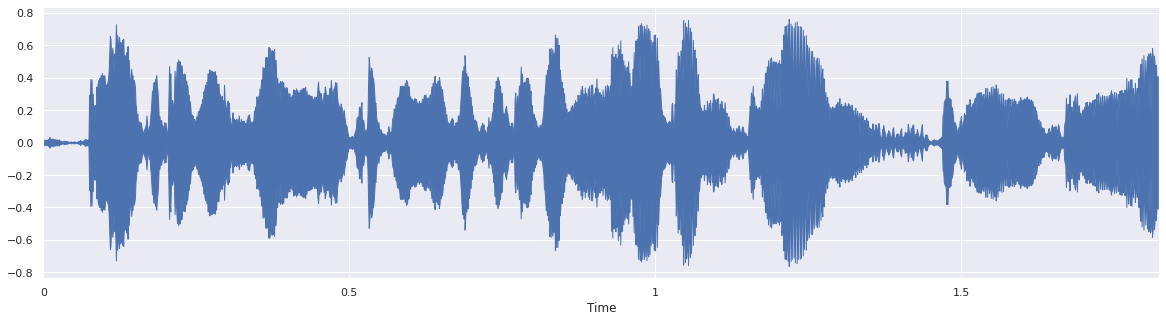

In [7]:
#call the plot wav function from the audio script to plot a sample wav file
audio.plot_wav(data['Location'][1],44100)

In [8]:
#we begin by making all text lower case
data['text']=data['text'].apply(lambda x: x.lower())

In [90]:
#we remove any punctuation marks that might hinder our model
import string

data['text']=data['text'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

In [9]:
data

,wav_file,text,length,Location,duration
0,SWH-05-20101106_16k-emission_swahili_05h30_-_0...,yanayo andaliwa nami pendo pondo idhaa ya kisw...,51,../data/alldata\SWH-05-20101106_16k-emission_s...,3.100000
1,SWH-05-20101106_16k-emission_swahili_05h30_-_0...,inayokutangazia moja kwa moja kutoka jijini da...,66,../data/alldata\SWH-05-20101106_16k-emission_s...,3.650023
2,SWH-05-20101106_16k-emission_swahili_05h30_-_0...,juma hili bara la afrika limeshuhudia raia wa ...,59,../data/alldata\SWH-05-20101106_16k-emission_s...,3.900000
3,SWH-05-20101106_16k-emission_swahili_05h30_-_0...,wakipiga kura ya maoni ilikufanya mabadiliko ya,47,../data/alldata\SWH-05-20101106_16k-emission_s...,2.940000
4,SWH-05-20101106_16k-emission_swahili_05h30_-_0...,kule abidjan raia wa jiji hilo,30,../data/alldata\SWH-05-20101106_16k-emission_s...,2.450023
...,...,...,...,...,...
10174,SWH-15-20110310_16k-emission_swahili_15h00_-_1...,na somo lile lililopokelewa kule kenya,38,../data/alldata\SWH-15-20110310_16k-emission_s...,2.500091
10175,SWH-15-20110310_16k-emission_swahili_15h00_-_1...,ambapo mtu aliyeshindwa kwenye uchaguzi,39,../data/alldata\SWH-15-20110310_16k-emission_s...,2.910023
10176,SWH-15-20110310_16k-emission_swahili_15h00_-_1...,ni kauli yake mchambuzi wa masuala ya siasa,43,../data/alldata\SWH-15-20110310_16k-emission_s...,2.950023
10177,SWH-15-20110310_16k-emission_swahili_15h00_-_1...,mwanasheria anayemtetea rais wa zamani wa liberia,49,../data/alldata\SWH-15-20110310_16k-emission_s...,2.590023


In [10]:
#remove any extra padding and whitespaces
data['text']=data['text'].apply(lambda x: re.sub(' +',' ',x))

In [61]:
# def char_map(text):
#     charlist=[]
#     for chars in text:
    
#         charlist.append(ord(chars))
        
#     return charlist



# data['Textmap']=data['text'].apply(lambda x: char_map(x))

In [11]:
"""
Defines two dictionaries for converting 
between text and integer sequences.
"""

char_map_str = """
' 0
 <SPACE> 1
 a 2
 b 3
 c 4
 d 5
 e 6
 f 7
 g 8
 h 9
 i 10
 j 11
 k 12
 l 13
 m 14
 n 15
 o 16
 p 17
 q 18
 r 19
 s 20
 t 21
 u 22
 v 23
 w 24
 x 25
 y 26
 z 27
 N 28
 U 29
 K 30
 1 31
 2 32
 3 33
 4 34
 5 35
 6 36
 7 37
 8 38
 9 39
 0 40
 < 41
 > 42
 , 43
 . 45
 ? 46
 - 47
 _ 48
"""
# the "blank" character is mapped to 28

char_map = {}
index_map = {}
for line in char_map_str.strip().split('\n'):
    ch, index = line.split()
    char_map[ch] = int(index)
    index_map[int(index)+1] = ch
index_map[2] = ' '

In [12]:
char_map

{"'": 0,
 '<SPACE>': 1,
 'a': 2,
 'b': 3,
 'c': 4,
 'd': 5,
 'e': 6,
 'f': 7,
 'g': 8,
 'h': 9,
 'i': 10,
 'j': 11,
 'k': 12,
 'l': 13,
 'm': 14,
 'n': 15,
 'o': 16,
 'p': 17,
 'q': 18,
 'r': 19,
 's': 20,
 't': 21,
 'u': 22,
 'v': 23,
 'w': 24,
 'x': 25,
 'y': 26,
 'z': 27,
 'N': 28,
 'U': 29,
 'K': 30,
 '1': 31,
 '2': 32,
 '3': 33,
 '4': 34,
 '5': 35,
 '6': 36,
 '7': 37,
 '8': 38,
 '9': 39,
 '0': 40,
 '<': 41,
 '>': 42,
 ',': 43,
 '.': 45,
 '?': 46,
 '-': 47,
 '_': 48}

In [13]:
newdata=data[['Location','text','duration']]

In [13]:
newdata.columns=['key','text','duration']

In [14]:
train_data=newdata.iloc[:8000,:]
valid_data=newdata.iloc[8001:,:]

print("Shape of new dataframes - {} , {}".format(train_data.shape, valid_data.shape))

Shape of new dataframes - (8000, 3) , (2178, 3)


In [15]:
train_data.to_json('../data/train_corpus.json', orient='records', lines=True)
valid_data.to_json('../data/valid_corpus.json', orient='records', lines=True)

In [7]:
import soundfile
from numpy.lib.stride_tricks import as_strided

def feat_dimen(window,max_freq):
    return int(0.001 * window * max_freq)+1



In [8]:
"""
Defines various functions for processing the data.
"""
import numpy as np
import soundfile
from numpy.lib.stride_tricks import as_strided


def calc_feat_dim(window, max_freq):
    return int(0.001 * window * max_freq) + 1

def conv_output_length(input_length, filter_size, border_mode, stride,
                       dilation=1):
    """ Compute the length of the output sequence after 1D convolution along
        time. Note that this function is in line with the function used in
        Convolution1D class from Keras.
    Params:
        input_length (int): Length of the input sequence.
        filter_size (int): Width of the convolution kernel.
        border_mode (str): Only support `same` or `valid`.
        stride (int): Stride size used in 1D convolution.
        dilation (int)
    """
    if input_length is None:
        return None
    assert border_mode in {'same', 'valid'}
    dilated_filter_size = filter_size + (filter_size - 1) * (dilation - 1)
    if border_mode == 'same':
        output_length = input_length
    elif border_mode == 'valid':
        output_length = input_length - dilated_filter_size + 1
    return (output_length + stride - 1) // stride


def spectrogram(samples, fft_length=256, sample_rate=2, hop_length=128):
    """
    Compute the spectrogram for a real signal.
    The parameters follow the naming convention of
    matplotlib.mlab.specgram

    Args:
        samples (1D array): input audio signal
        fft_length (int): number of elements in fft window
        sample_rate (scalar): sample rate
        hop_length (int): hop length (relative offset between neighboring
            fft windows).

    Returns:
        x (2D array): spectrogram [frequency x time]
        freq (1D array): frequency of each row in x

    Note:
        This is a truncating computation e.g. if fft_length=10,
        hop_length=5 and the signal has 23 elements, then the
        last 3 elements will be truncated.
    """
    assert not np.iscomplexobj(samples), "Must not pass in complex numbers"

    window = np.hanning(fft_length)[:, None]
    window_norm = np.sum(window**2)

    # The scaling below follows the convention of
    # matplotlib.mlab.specgram which is the same as
    # matlabs specgram.
    scale = window_norm * sample_rate

    trunc = (len(samples) - fft_length) % hop_length
    x = samples[:len(samples) - trunc]

    # "stride trick" reshape to include overlap
    nshape = (fft_length, (len(x) - fft_length) // hop_length + 1)
    nstrides = (x.strides[0], x.strides[0] * hop_length)
    x = as_strided(x, shape=nshape, strides=nstrides)

    # window stride sanity check
    assert np.all(x[:, 1] == samples[hop_length:(hop_length + fft_length)])

    # broadcast window, compute fft over columns and square mod
    x = np.fft.rfft(x * window, axis=0)
    x = np.absolute(x)**2

    # scale, 2.0 for everything except dc and fft_length/2
    x[1:-1, :] *= (2.0 / scale)
    x[(0, -1), :] /= scale

    freqs = float(sample_rate) / fft_length * np.arange(x.shape[0])

    return x, freqs


def spectrogram_from_file(filename, step=10, window=20, max_freq=None,
                          eps=1e-14):
    """ Calculate the log of linear spectrogram from FFT energy
    Params:
        filename (str): Path to the audio file
        step (int): Step size in milliseconds between windows
        window (int): FFT window size in milliseconds
        max_freq (int): Only FFT bins corresponding to frequencies between
            [0, max_freq] are returned
        eps (float): Small value to ensure numerical stability (for ln(x))
    """
    with soundfile.SoundFile(filename) as sound_file:
        audio = sound_file.read(dtype='float32')
        sample_rate = sound_file.samplerate
        if audio.ndim >= 2:
            audio = np.mean(audio, 1)
        if max_freq is None:
            max_freq = sample_rate / 2
        if max_freq > sample_rate / 2:
            raise ValueError("max_freq must not be greater than half of "
                             " sample rate")
        if step > window:
            raise ValueError("step size must not be greater than window size")
        hop_length = int(0.001 * step * sample_rate)
        fft_length = int(0.001 * window * sample_rate)
        pxx, freqs = spectrogram(
            audio, fft_length=fft_length, sample_rate=sample_rate,
            hop_length=hop_length)
        ind = np.where(freqs <= max_freq)[0][-1] + 1
    return np.transpose(np.log(pxx[:ind, :] + eps))

def text_to_int_sequence(text):
    """ Convert text to an integer sequence """
    int_sequence = []
    for c in text:
        if c == ' ':
            ch = char_map['<SPACE>']
        else:
            ch = char_map[c]
        int_sequence.append(ch)
    return int_sequence

def int_sequence_to_text(int_sequence):
    """ Convert an integer sequence to text """
    text = []
    for c in int_sequence:
        ch = index_map[c]
        text.append(ch)
    return text


In [9]:
import json
import numpy as np
import random
from python_speech_features import mfcc
import librosa
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable



RNG_SEED = 123

class AudioGenerator():
    def __init__(self, step=10, window=20, max_freq=8000, mfcc_dim=13,
        minibatch_size=4000, desc_file=None, spectrogram=True, max_duration=10.0, 
        sort_by_duration=False):
        """
        Params:
            step (int): Step size in milliseconds between windows (for spectrogram ONLY)
            window (int): FFT window size in milliseconds (for spectrogram ONLY)
            max_freq (int): Only FFT bins corresponding to frequencies between
                [0, max_freq] are returned (for spectrogram ONLY)
            desc_file (str, optional): Path to a JSON-line file that contains
                labels and paths to the audio files. If this is None, then
                load metadata right away
        """

        self.feat_dim = calc_feat_dim(window, max_freq)
        self.mfcc_dim = mfcc_dim
        self.feats_mean = np.zeros((self.feat_dim,))
        self.feats_std = np.ones((self.feat_dim,))
        self.rng = random.Random(RNG_SEED)
        if desc_file is not None:
            self.load_metadata_from_desc_file(desc_file)
        self.step = step
        self.window = window
        self.max_freq = max_freq
        self.cur_train_index = 0
        self.cur_valid_index = 0
        self.cur_test_index = 0
        self.max_duration=max_duration
        self.minibatch_size = minibatch_size
        self.spectrogram = spectrogram
        self.sort_by_duration = sort_by_duration


    def get_batch(self, partition):
        """ Obtain a batch of train, validation, or test data
        """
        if partition == 'train':
            audio_paths = self.train_audio_paths
            cur_index = self.cur_train_index
            texts = self.train_texts
        elif partition == 'valid':
            audio_paths = self.valid_audio_paths
            cur_index = self.cur_valid_index
            texts = self.valid_texts
        elif partition == 'test':
            audio_paths = self.test_audio_paths
            cur_index = self.test_valid_index
            texts = self.test_texts
        else:
            raise Exception("Invalid partition. "
                "Must be train/validation")

        features = [self.normalize(self.featurize(a)) for a in 
            audio_paths[cur_index:cur_index+self.minibatch_size]]

        # calculate necessary sizes
        max_length = max([features[i].shape[0] 
            for i in range(0, self.minibatch_size)])
        max_string_length = max([len(texts[cur_index+i]) 
            for i in range(0, self.minibatch_size)])
        
        # initialize the arrays
        X_data = np.zeros([self.minibatch_size, max_length, 
            self.feat_dim*self.spectrogram + self.mfcc_dim*(not self.spectrogram)])
        labels = np.ones([self.minibatch_size, max_string_length]) * 28
        input_length = np.zeros([self.minibatch_size, 1])
        label_length = np.zeros([self.minibatch_size, 1])
        
        for i in range(0, self.minibatch_size):
            # calculate X_data & input_length
            feat = features[i]
            input_length[i] = feat.shape[0]
            X_data[i, :feat.shape[0], :] = feat

            # calculate labels & label_length
            label = np.array(text_to_int_sequence(texts[cur_index+i])) 
            labels[i, :len(label)] = label
            label_length[i] = len(label)
 
        # return the arrays
        outputs = {'ctc': np.zeros([self.minibatch_size])}
        inputs = {'the_input': X_data, 
                  'the_labels': labels, 
                  'input_length': input_length, 
                  'label_length': label_length 
                 }
        
        
        return (inputs, outputs)

    def shuffle_data_by_partition(self, partition):
        """ Shuffle the training or validation data
        """
        if partition == 'train':
            self.train_audio_paths, self.train_durations, self.train_texts = shuffle_data(
                self.train_audio_paths, self.train_durations, self.train_texts)
        elif partition == 'valid':
            self.valid_audio_paths, self.valid_durations, self.valid_texts = shuffle_data(
                self.valid_audio_paths, self.valid_durations, self.valid_texts)
        else:
            raise Exception("Invalid partition. "
                "Must be train/validation")

    def sort_data_by_duration(self, partition):
        """ Sort the training or validation sets by (increasing) duration
        """
        if partition == 'train':
            self.train_audio_paths, self.train_durations, self.train_texts = sort_data(
                self.train_audio_paths, self.train_durations, self.train_texts)
        elif partition == 'valid':
            self.valid_audio_paths, self.valid_durations, self.valid_texts = sort_data(
                self.valid_audio_paths, self.valid_durations, self.valid_texts)
        else:
            raise Exception("Invalid partition. "
                "Must be train/validation")

    def next_train(self):
        """ Obtain a batch of training data
        """
        while True:
            ret = self.get_batch('train')
            self.cur_train_index += self.minibatch_size
            if self.cur_train_index >= len(self.train_texts) - self.minibatch_size:
                self.cur_train_index = 0
                self.shuffle_data_by_partition('train')
            yield ret    

    def next_valid(self):
        """ Obtain a batch of validation data
        """
        while True:
            ret = self.get_batch('valid')
            self.cur_valid_index += self.minibatch_size
            if self.cur_valid_index >= len(self.valid_texts) - self.minibatch_size:
                self.cur_valid_index = 0
                self.shuffle_data_by_partition('valid')
            yield ret

    def next_test(self):
        """ Obtain a batch of test data
        """
        while True:
            ret = self.get_batch('test')
            self.cur_test_index += self.minibatch_size
            if self.cur_test_index >= len(self.test_texts) - self.minibatch_size:
                self.cur_test_index = 0
            yield ret

    def load_train_data(self, desc_file='../data/trainprep_corpus.json'):
        self.load_metadata_from_desc_file(desc_file, 'train')
        self.fit_train()
        if self.sort_by_duration:
            self.sort_data_by_duration('train')

    def load_validation_data(self, desc_file='../data/validprep_corpus.json'):
        self.load_metadata_from_desc_file(desc_file, 'validation')
        if self.sort_by_duration:
            self.sort_data_by_duration('valid')

    def load_test_data(self, desc_file='../data/testprep_corpus.json'):
        self.load_metadata_from_desc_file(desc_file, 'test')
    
    def load_metadata_from_desc_file(self, desc_file, partition):
        """ Read metadata from a JSON-line file
            (possibly takes long, depending on the filesize)
        Params:
            desc_file (str):  Path to a JSON-line file that contains labels and
                paths to the audio files
            partition (str): One of 'train', 'validation' or 'test'
        """
        audio_paths, durations, texts = [], [], []
        with open(desc_file) as json_line_file:
            for line_num, json_line in enumerate(json_line_file):
                try:
                    spec = json.loads(json_line)
                    if float(spec['duration']) > self.max_duration:
                        continue
                    audio_paths.append(spec['key'])
                    durations.append(float(spec['duration']))
                    texts.append(spec['text'])
                except Exception as e:
                    # Change to (KeyError, ValueError) or
                    # (KeyError,json.decoder.JSONDecodeError), depending on
                    # json module version
                    print('Error reading line #{}: {}'
                                .format(line_num, json_line))
        if partition == 'train':
            self.train_audio_paths = audio_paths
            self.train_durations = durations
            self.train_texts = texts
        elif partition == 'validation':
            self.valid_audio_paths = audio_paths
            self.valid_durations = durations
            self.valid_texts = texts
        elif partition == 'test':
            self.test_audio_paths = audio_paths
            self.test_durations = durations
            self.test_texts = texts
        else:
            raise Exception("Invalid partition to load metadata. "
             "Must be train/validation/test")
            
    def fit_train(self, k_samples=100):
        """ Estimate the mean and std of the features from the training set
        Params:
            k_samples (int): Use this number of samples for estimation
        """
        k_samples = min(k_samples, len(self.train_audio_paths))
        samples = self.rng.sample(self.train_audio_paths, k_samples)
        feats = [self.featurize(s) for s in samples]
        feats = np.vstack(feats)
        self.feats_mean = np.mean(feats, axis=0)
        self.feats_std = np.std(feats, axis=0)
        
    def featurize(self, audio_clip):
        """ For a given audio clip, calculate the corresponding feature
        Params:
            audio_clip (str): Path to the audio clip
        """
        if self.spectrogram:
            return spectrogram_from_file(
                audio_clip, step=self.step, window=self.window,
                max_freq=self.max_freq)
        else:
            (rate, sig) = wav.read(audio_clip)
            return mfcc(sig, rate, numcep=self.mfcc_dim)

    def normalize(self, feature, eps=1e-14):
        """ Center a feature using the mean and std
        Params:
            feature (numpy.ndarray): Feature to normalize
        """
        return (feature - self.feats_mean) / (self.feats_std + eps)

def shuffle_data(audio_paths, durations, texts):
    """ Shuffle the data (called after making a complete pass through 
        training or validation data during the training process)
    Params:
        audio_paths (list): Paths to audio clips
        durations (list): Durations of utterances for each audio clip
        texts (list): Sentences uttered in each audio clip
    """
    p = np.random.permutation(len(audio_paths))
    audio_paths = [audio_paths[i] for i in p] 
    durations = [durations[i] for i in p] 
    texts = [texts[i] for i in p]
    return audio_paths, durations, texts

def sort_data(audio_paths, durations, texts):
    """ Sort the data by duration 
    Params:
        audio_paths (list): Paths to audio clips
        durations (list): Durations of utterances for each audio clip
        texts (list): Sentences uttered in each audio clip
    """
    p = np.argsort(durations).tolist()
    audio_paths = [audio_paths[i] for i in p]
    durations = [durations[i] for i in p] 
    texts = [texts[i] for i in p]
    return audio_paths, durations, texts

def vis_train_features(index=0):
    """ Visualizing the data point in the training set at the supplied index
    """
    # obtain spectrogram
    audio_gen = AudioGenerator(spectrogram=True)
    audio_gen.load_train_data()
    vis_audio_path = audio_gen.train_audio_paths[index]
    vis_spectrogram_feature = audio_gen.normalize(audio_gen.featurize(vis_audio_path))
    # obtain mfcc
    audio_gen = AudioGenerator(spectrogram=False)
    audio_gen.load_train_data()
    vis_mfcc_feature = audio_gen.normalize(audio_gen.featurize(vis_audio_path))
    # obtain text label
    vis_text = audio_gen.train_texts[index]
    # obtain raw audio
    vis_raw_audio, _ = librosa.load(vis_audio_path)
    # print total number of training examples
    print('There are %d total training examples.' % len(audio_gen.train_audio_paths))
    # return labels for plotting
    return vis_text, vis_raw_audio, vis_mfcc_feature, vis_spectrogram_feature, vis_audio_path


def plot_raw_audio(vis_raw_audio):
    # plot the raw audio signal
    fig = plt.figure(figsize=(12,3))
    ax = fig.add_subplot(111)
    steps = len(vis_raw_audio)
    ax.plot(np.linspace(1, steps, steps), vis_raw_audio)
    plt.title('Audio Signal')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.show()

def plot_mfcc_feature(vis_mfcc_feature):
    # plot the MFCC feature
    fig = plt.figure(figsize=(12,5))
    ax = fig.add_subplot(111)
    im = ax.imshow(vis_mfcc_feature, cmap=plt.cm.jet, aspect='auto')
    plt.title('Normalized MFCC')
    plt.ylabel('Time')
    plt.xlabel('MFCC Coefficient')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im, cax=cax)
    ax.set_xticks(np.arange(0, 13, 2), minor=False);
    plt.show()

def plot_spectrogram_feature(vis_spectrogram_feature):
    # plot the normalized spectrogram
    fig = plt.figure(figsize=(12,5))
    ax = fig.add_subplot(111)
    im = ax.imshow(vis_spectrogram_feature, cmap=plt.cm.jet, aspect='auto')
    plt.title('Normalized Spectrogram')
    plt.ylabel('Time')
    plt.xlabel('Frequency')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im, cax=cax)
    plt.show()

In [18]:
model=AudioGenerator()

In [19]:
vis_text, vis_raw_audio, vis_mfcc_feature, vis_spectrogram_feature, vis_audio_path = vis_train_features()

There are 6290 total training examples.


In [20]:
model.load_train_data()

In [21]:
model.load_validation_data()

In [22]:
model.fit_train()

In [23]:
a,b=model.get_batch('train')

In [24]:
gx = pd.DataFrame({'the_input': list(a['the_input']), 'the_labels': list(a['the_labels']), 'input_length': list(a['input_length']), 'label_length': list(a['label_length'])})

In [28]:
gx.to_csv('../data/prep_model.csv',index=False)

In [50]:
dx.to_csv('../data/procGen2.csv',index=False)

In [51]:
data.to_json('../data/train.json', orient='records', lines=True)

In [76]:
data.to_json('../data/train.json', orient='records', lines=True)

MemoryError: 

In [52]:
a,b=model.get_batch('valid')
dz = pd.DataFrame({'the_input': list(a['the_input']), 'the_labels': list(a['the_labels']), 'input_length': list(a['input_length']), 'label_length': list(a['label_length'])})

IndexError: list index out of range

In [26]:
!pip3 install --user --upgrade tensorflow

     |█████████████████████████████▏  | 418.5 MB 80.6 MB/s eta 0:00:013  |                                | 768 kB 15.2 MB/s eta 0:00:31     |████████████▎                   | 175.3 MB 84.2 MB/s eta 0:00:04

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



     |████████████████████████████████| 458.4 MB 6.2 kB/s 
     |████████████████████████████████| 4.3 MB 44.9 MB/s eta 0:00:01     |███████████▌                    | 1.5 MB 44.9 MB/s eta 0:00:01
     |████████████████████████████████| 462 kB 52.8 MB/s eta 0:00:01
     |████████████████████████████████| 1.3 MB 55.5 MB/s eta 0:00:01
  Created wheel for clang: filename=clang-5.0-py3-none-any.whl size=30702 sha256=e9399a5037fc5cf391cfa72ba66976639f24c20138e0a6b42da69febd46253f4
  Stored in directory: /home/blaise_papa/.cache/pip/wheels/3a/ce/7a/27094f689461801c934296d07078773603663dfcaca63bb064
Successfully built clang
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [10]:
#from keras.backend.tensorflow_backend import set_session
#from tensorflow.keras.backend.tensorflow_backend import set_session
from tensorflow.compat.v1 import keras
import tensorflow.compat.v1 as tf 
tf.disable_v2_behavior()
tf.compat.v1.disable_eager_execution()
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
tf.keras.backend.set_session(tf.Session(config=config))

NotFoundError: /opt/miniconda/lib/python3.9/site-packages/tensorflow/core/kernels/libtfkernel_sobol_op.so: undefined symbol: _ZNK10tensorflow8OpKernel11TraceStringB5cxx11ERKNS_15OpKernelContextEb

In [11]:
from keras import backend as K
from keras.models import Model
from keras.layers import (BatchNormalization, Conv1D, Dense, Input, 
    TimeDistributed, Activation, Bidirectional, SimpleRNN, GRU, LSTM)

def simple_rnn_model(input_dim, output_dim=50):
    """ Build a recurrent network for speech 
    """
    # Main acoustic input
    input_data = Input(name='the_input', shape=(None, input_dim))
    # Add recurrent layer
    simp_rnn = GRU(output_dim, return_sequences=True, 
                 implementation=2, name='rnn')(input_data)
    # Add softmax activation layer
    y_pred = Activation('softmax', name='softmax')(simp_rnn)
    # Specify the model
    model = Model(inputs=input_data, outputs=y_pred)
    model.output_length = lambda x: x
    print(model.summary())
    return model

def rnn_model(input_dim, units, activation, output_dim=50):
    """ Build a recurrent network for speech 
    """
    # Main acoustic input
    input_data = Input(name='the_input', shape=(None, input_dim))
    # Add recurrent layer
    simp_rnn = GRU(units, activation=activation,
        return_sequences=True, implementation=2, name='rnn')(input_data)
    # TODO: Add batch normalization 
   
    bn_rnn = BatchNormalization()(simp_rnn)
    # TODO: Add a TimeDistributed(Dense(output_dim)) layer
    time_dense = TimeDistributed(Dense(output_dim))(bn_rnn)
    # Add softmax activation layer
    y_pred = Activation('softmax', name='softmax')(time_dense)
    # Specify the model
    model = Model(inputs=input_data, outputs=y_pred)
    model.output_length = lambda x: x
    print(model.summary())
    return model


def cnn_rnn_model(input_dim, filters, kernel_size, conv_stride,
    conv_border_mode, units, output_dim=50):
    """ Build a recurrent + convolutional network for speech 
    """
    # Main acoustic input
    input_data = Input(name='the_input', shape=(None, input_dim))
    # Add convolutional layer
    conv_1d = Conv1D(filters, kernel_size, 
                     strides=conv_stride, 
                     padding=conv_border_mode,
                     activation='relu',
                     name='conv1d')(input_data)
    # Add batch normalization
    bn_cnn = BatchNormalization(name='bn_conv_1d')(conv_1d)
    # Add a recurrent layer
    simp_rnn = SimpleRNN(units, activation='relu',
        return_sequences=True, implementation=2, name='rnn')(bn_cnn)
    # TODO: Add batch normalization
    bn_rnn = BatchNormalization(name='bn_norm')(simp_rnn)
    # TODO: Add a TimeDistributed(Dense(output_dim)) layer
    time_dense = TimeDistributed(Dense(output_dim))(bn_rnn)
    # Add softmax activation layer
    y_pred = Activation('softmax', name='softmax')(time_dense)
    # Specify the model
    model = Model(inputs=input_data, outputs=y_pred)
    model.output_length = lambda x: cnn_output_length(
        x, kernel_size, conv_border_mode, conv_stride)
    print(model.summary())
    return model

def cnn_output_length(input_length, filter_size, border_mode, stride,
                       dilation=1):
    """ Compute the length of the output sequence after 1D convolution along
        time. Note that this function is in line with the function used in
        Convolution1D class from Keras.
    Params:
        input_length (int): Length of the input sequence.
        filter_size (int): Width of the convolution kernel.
        border_mode (str): Only support `same` or `valid`.
        stride (int): Stride size used in 1D convolution.
        dilation (int)
    """
    if input_length is None:
        return None
    assert border_mode in {'same', 'valid'}
    dilated_filter_size = filter_size + (filter_size - 1) * (dilation - 1)
    if border_mode == 'same':
        output_length = input_length
    elif border_mode == 'valid':
        output_length = input_length - dilated_filter_size + 1
    return (output_length + stride - 1) // stride

def deep_rnn_model(input_dim, units, recur_layers, output_dim=50):
    """ Build a deep recurrent network for speech 
    """
    # Main acoustic input
    input_data = Input(name='the_input', shape=(None, input_dim))
    # TODO: Add recurrent layers, each with batch normalization
    
    
    simp_rnn = SimpleRNN(units, activation='relu',
        return_sequences=True, implementation=2, name='rnn')(input_data)
    # TODO: Add batch normalization
    
    bn_rnn = BatchNormalization(name='bn_norm')(simp_rnn)
    
    ## the loop should be here
    for i in range(1, recur_layers):
        print("+Layer", i)
    
        #simp_rnn = LSTM(units, name='rnn' + str(i), return_sequences=True)(bn_rnn)
        #simp_rnn = SimpleRNN(units, name='rnn' + str(i), return_sequences=True, activation='relu')(bn_rnn)
        simp_rnn = GRU(units, name='rnn' + str(i), return_sequences=True, activation='relu')(bn_rnn)
        # TODO: Add batch normalization
        bn_rnn = BatchNormalization(name='bnorm' + str(i))(simp_rnn)
   
                                    
    time_dense = TimeDistributed(Dense(output_dim))(bn_rnn)
    
    # Add softmax activation layer
    y_pred = Activation('softmax', name='softmax')(time_dense)
    # Specify the model
    model = Model(inputs=input_data, outputs=y_pred)
    model.output_length = lambda x: x
    print(model.summary())
    return model

def bidirectional_rnn_model(input_dim, units, output_dim=50):
    """ Build a bidirectional recurrent network for speech
    """
    # Main acoustic input
    input_data = Input(name='the_input', shape=(None, input_dim))
    # TODO: Add bidirectional recurrent layer
    bidir_rnn = Bidirectional(LSTM(units, return_sequences=True))(input_data)
  
   # bidir_rnn = GRU(units, activation='relu',
   #     return_sequences=True, implementation=2, name='rnn')(input_data)
    bn_rnn = BatchNormalization(name='bnorm')(bidir_rnn)
    
    # TODO: Add a TimeDistributed(Dense(output_dim)) layer
    time_dense = TimeDistributed(Dense(output_dim))(bn_rnn)
    # Add softmax activation layer
    y_pred = Activation('softmax', name='softmax')(time_dense)
    # Specify the model
    model = Model(inputs=input_data, outputs=y_pred)
    model.output_length = lambda x: x
    print(model.summary())
    return model

def final_model(input_dim, units, output_dim=50):
    """ Build a deep network for speech 
    """
    # Main acoustic input
    input_data = Input(name='the_input', shape=(None, input_dim))
    # TODO: Specify the layers in your network
    
    bidir_rnn1 = Bidirectional(LSTM(units, return_sequences=True, dropout_W=0.5, dropout_U=0.5,
         name='bidir_rnn1'))(input_data)
    
    bn_rnn1 = BatchNormalization(name='bnorm1')(bidir_rnn1)
    
    bidir_rnn2 = Bidirectional(LSTM(units, return_sequences=True, 
         name='bidir_rnn2'))(bn_rnn1)
    
    bn_rnn2 = BatchNormalization(name='bnorm2')(bidir_rnn2)
 
    time_dense = TimeDistributed(Dense(output_dim))(bn_rnn2)
        
    # TODO: Add softmax activation layer
    y_pred = Activation('softmax', name='softmax')(time_dense)
    # Specify the model
    model = Model(inputs=input_data, outputs=y_pred)
    # TODO: Specify model.output_length
    model.output_length = model.output_length = lambda x: x
    print(model.summary())
    return model

NotFoundError: /opt/miniconda/lib/python3.9/site-packages/tensorflow/core/kernels/libtfkernel_sobol_op.so: undefined symbol: _ZNK10tensorflow8OpKernel11TraceStringB5cxx11ERKNS_15OpKernelContextEb

In [30]:
model_1 = rnn_model(input_dim=161, # change to 13 if you would like to use MFCC features
                    units=200,
                    activation='relu')

Instructions for updating:
Colocations handled automatically by placer.
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
the_input (InputLayer)       [(None, None, 161)]       0         
_________________________________________________________________
rnn (GRU)                    (None, None, 200)         217200    
_________________________________________________________________
batch_normalization (BatchNo (None, None, 200)         800       
_________________________________________________________________
time_distributed (TimeDistri (None, None, 50)          10050     
_________________________________________________________________
softmax (Activation)         (None, None, 50)          0         
Total params: 228,050
Trainable params: 227,650
Non-trainable params: 400
_________________________________________________________________
None


In [12]:
"""
Defines a functions for training a NN.
"""


import _pickle as pickle

from keras import backend as K
from keras.models import Model
from keras.layers import (Input, Lambda)
from tensorflow.keras.optimizers import SGD
from keras.callbacks import ModelCheckpoint   
import os

def ctc_lambda_func(args):
    y_pred, labels, input_length, label_length = args
    return K.ctc_batch_cost(labels, y_pred, input_length, label_length)

def add_ctc_loss(input_to_softmax):
    the_labels = Input(name='the_labels', shape=(None,), dtype='float32')
    input_lengths = Input(name='input_length', shape=(1,), dtype='int64')
    label_lengths = Input(name='label_length', shape=(1,), dtype='int64')
    output_lengths = Lambda(input_to_softmax.output_length)(input_lengths)
    # CTC loss is implemented in a lambda layer
    loss_out = Lambda(ctc_lambda_func, output_shape=(1,), name='ctc')(
        [input_to_softmax.output, the_labels, output_lengths, label_lengths])
    model = Model(
        inputs=[input_to_softmax.input, the_labels, input_lengths, label_lengths], 
        outputs=loss_out)
    return model

def train_model(input_to_softmax, 
                pickle_path,
                save_model_path,
                train_json='../data/trainprep_corpus.json',
                valid_json='../data/validprep_corpus.json',
                minibatch_size=20,
                spectrogram=True,
                mfcc_dim=13,
                optimizer='adam',
                epochs=20,
                verbose=1,
                sort_by_duration=False,
                max_duration=10.0):
    
    # create a class instance for obtaining batches of data
    audio_gen = AudioGenerator(minibatch_size=minibatch_size, 
        spectrogram=spectrogram, mfcc_dim=mfcc_dim, max_duration=max_duration,
        sort_by_duration=sort_by_duration)
    # add the training data to the generator
    audio_gen.load_train_data(train_json)
    audio_gen.load_validation_data(valid_json)
    # calculate steps_per_epoch
    num_train_examples=len(audio_gen.train_audio_paths)
    steps_per_epoch = num_train_examples//minibatch_size
    # calculate validation_steps
    num_valid_samples = len(audio_gen.valid_audio_paths) 
    validation_steps = num_valid_samples//minibatch_size
    
    # add CTC loss to the NN specified in input_to_softmax
    model = add_ctc_loss(input_to_softmax)

    # CTC loss is implemented elsewhere, so use a dummy lambda function for the loss
    model.compile(loss={'ctc': lambda y_true, y_pred: y_pred}, optimizer=optimizer)

    # make results/ directory, if necessary
    if not os.path.exists('results'):
        os.makedirs('results')

    # add checkpointer
    checkpointer = ModelCheckpoint(filepath='results/'+save_model_path, verbose=0)

    # train the model
    hist = model.fit_generator(generator=audio_gen.next_train(), steps_per_epoch=steps_per_epoch,
        epochs=epochs, validation_data=audio_gen.next_valid(), validation_steps=validation_steps,
        callbacks=[checkpointer], verbose=verbose)

    # save model loss
    with open('results/'+pickle_path, 'wb') as f:
        pickle.dump(hist.history, f)

NotFoundError: /opt/miniconda/lib/python3.9/site-packages/tensorflow/core/kernels/libtfkernel_sobol_op.so: undefined symbol: _ZNK10tensorflow8OpKernel11TraceStringB5cxx11ERKNS_15OpKernelContextEb

In [ ]:
train_model(input_to_softmax=model_1, 
            pickle_path='model_12.pickle', 
            save_model_path='model_12.h5',
            spectrogram=True) # change to False if you would like to use MFCC features

/opt/miniconda/lib/python3.9/site-packages/keras/engine/training_v1.py:1229: UserWarning: `model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`model.fit_generator` is deprecated and '


Epoch 1/20


2021-08-12 13:07:56.308726: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-08-12 13:07:56.309288: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:00:1e.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2021-08-12 13:07:56.309308: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1766] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2021-08-12 13:07:56.309618: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1258] Device interconnect StreamE

314/314 [==============================] - ETA: 0s - batch: 156.5000 - size: 20.0000 - loss: 183.8687

/opt/miniconda/lib/python3.9/site-packages/keras/engine/training.py:2401: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


314/314 [==============================] - 373s 1s/step - batch: 156.5000 - size: 20.0000 - loss: 183.8687 - val_loss: 153.3581
Epoch 2/20
314/314 [==============================] - 367s 1s/step - batch: 156.5000 - size: 20.0000 - loss: 125.0739 - val_loss: 109.5707
Epoch 3/20
314/314 [==============================] - 364s 1s/step - batch: 156.5000 - size: 20.0000 - loss: 103.0395 - val_loss: 96.1505
Epoch 4/20
314/314 [==============================] - 355s 1s/step - batch: 156.5000 - size: 20.0000 - loss: 92.4119 - val_loss: 91.9864
Epoch 5/20
314/314 [==============================] - 341s 1s/step - batch: 156.5000 - size: 20.0000 - loss: 86.8759 - val_loss: 84.0912
Epoch 6/20
314/314 [==============================] - 360s 1s/step - batch: 156.5000 - size: 20.0000 - loss: 82.7993 - val_loss: 84.3196
Epoch 7/20
314/314 [==============================] - 358s 1s/step - batch: 156.5000 - size: 20.0000 - loss: 82.3538 - val_loss: 79.9056
Epoch 8/20
314/314 [===========================

In [79]:
# import tensorflow as tf
# rnnmodel = tf.keras.models.load_model('../notebooks/results/model_1.h5')

loaded_model = pickle.load(open("../notebooks/results/model_1.pickle",'rb'))

In [84]:
!pip install mlflow

     |████████████████████████████████| 14.4 MB 32.0 MB/s eta 0:00:01     |█████████████████████████▌      | 11.4 MB 32.0 MB/s eta 0:00:01     |███████████████████████████████▊| 14.3 MB 32.0 MB/s eta 0:00:01


In [114]:
import mlflow
import mlflow.sklearn
import matplotlib.pyplot as plt

mlflow.set_experiment("Simple RNN")
for itr in range(20):
    with mlflow.start_run():
        mlflow.log_param("Model", "Simple RNN" )
        ls=loaded_model.get('loss')[itr]
        val=loaded_model.get('val_loss')[itr]
        mlflow.log_metric("CTC_LOSS",ls)
        mlflow.log_metric("Validatio_Loss",val)
        
    
        
vals=pd.DataFrame.from_dict(loaded_model)

print (vals) 

plt.figure(figsize=(9,5))
plt.plot(vals['loss'],label="ctc_loss")
plt.plot(vals['val_loss'],label="validation_loss")
plt.xlabel("EPOCH")
plt.ylabel("LOSS")
plt.legend()
plt.show()
plt.savefig("../plots/RNN.png")

mlflow.log_artifact("../plots/RNN.png")

with open("metx.txt",'w') as outfile:
    outfile.write("values",vals)
    
    
    




INFO: 'Simple RNN' does not exist. Creating a new experiment


In [145]:
vals['loss][

,loss,val_loss
0,204.203783,144.186262
1,123.336521,108.117566
2,101.736609,97.177057
3,92.607982,89.969498
4,87.016154,85.384184
5,83.280995,82.998450
6,80.561730,81.415590
7,78.106823,80.498779
8,76.444469,78.959360
9,74.903045,78.199951


In [154]:

with open("../metrics/loss.txt",'w') as outfile:
    for ind in range(20):
        
        outfile.write("loss: %s\n"%str(vals['loss'][ind]))
        
with open("../metrics/val_loss.txt",'w') as outfile:
    for ind in range (20):
        outfile.write("val_loss: %s \n"%str(vals['val_loss'][ind]))

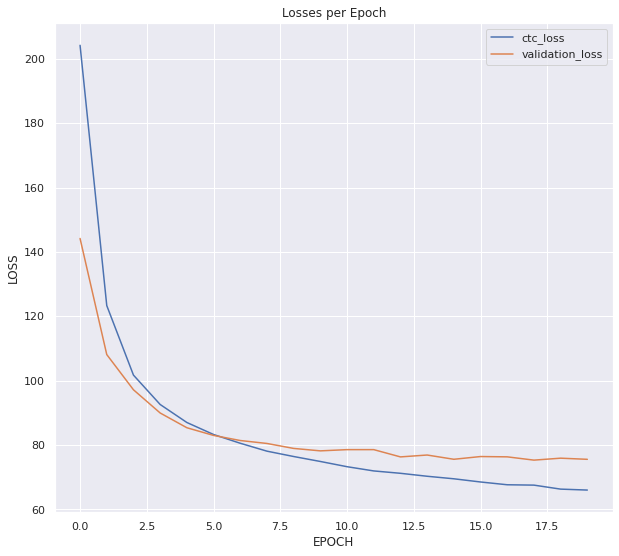

<Figure size 432x288 with 0 Axes>

In [160]:
plt.figure(figsize=(10,9))
plt.plot(vals['loss'],label="ctc_loss")
plt.plot(vals['val_loss'],label="validation_loss")
plt.title("Losses per Epoch")
plt.xlabel("EPOCH")
plt.ylabel("LOSS")
plt.legend()
plt.show()
plt.savefig("../plots/RNN.png")



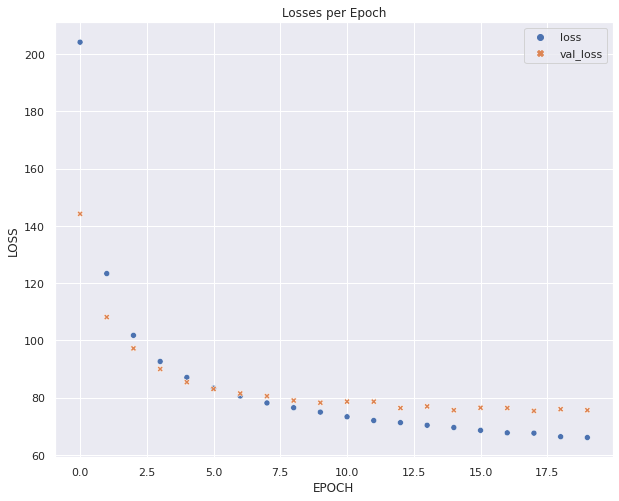

<Figure size 432x288 with 0 Axes>

In [159]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=vals)
plt.title("Losses per Epoch")
plt.xlabel("EPOCH")
plt.ylabel("LOSS")
plt.legend()
plt.show()
plt.savefig("../plots/SCRNN.png")

In [12]:
model_2 = cnn_rnn_model(input_dim=13, 
                        filters=200,
                        kernel_size=11, 
                        conv_stride=2,
                        conv_border_mode='valid',
                        units=200)

Instructions for updating:
Colocations handled automatically by placer.
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
the_input (InputLayer)       [(None, None, 13)]        0         
_________________________________________________________________
conv1d (Conv1D)              (None, None, 200)         28800     
_________________________________________________________________
bn_conv_1d (BatchNormalizati (None, None, 200)         800       
_________________________________________________________________
rnn (SimpleRNN)              (None, None, 200)         80200     
_________________________________________________________________
bn_norm (BatchNormalization) (None, None, 200)         800       
_________________________________________________________________
time_distributed (TimeDistri (None, None, 50)          10050     
_______________________________________________________

In [ ]:
train_model(input_to_softmax=model_2, 
            pickle_path='model_2.pickle', 
            save_model_path='model_2.h5',
            spectrogram=False) 

Epoch 1/20


2021-08-12 11:35:36.648872: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-08-12 11:35:36.650922: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:00:1e.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2021-08-12 11:35:36.650962: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1766] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2021-08-12 11:35:36.653031: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1258] Device interconnect StreamE

400/400 [==============================] - 533s 1s/step - batch: 199.5000 - size: 20.0000 - loss: 134.2269 - val_loss: 102.3963
Epoch 2/20
400/400 [==============================] - 537s 1s/step - batch: 199.5000 - size: 20.0000 - loss: 94.6022 - val_loss: 89.5285
Epoch 3/20
400/400 [==============================] - 531s 1s/step - batch: 199.5000 - size: 20.0000 - loss: 87.4361 - val_loss: 84.9754
Epoch 4/20
289/400 [====================>.........] - ETA: 2:03 - batch: 144.0000 - size: 20.0000 - loss: 83.6313

In [15]:

loaded_model = pickle.load(open("../notebooks/results/model_2.pickle",'rb'))

In [18]:
import mlflow
import mlflow.sklearn
import matplotlib.pyplot as plt

mlflow.set_experiment("CNN _ RNN")
for itr in range(20):
    with mlflow.start_run():
        mlflow.log_param("Model", "CNN RNN" )
        ls=loaded_model.get('loss')[itr]
        val=loaded_model.get('val_loss')[itr]
        mlflow.log_metric("CTC_LOSS",ls)
        mlflow.log_metric("ValidatioN_Loss",val)
        
    
        
vals=pd.DataFrame.from_dict(loaded_model)

print (vals) 

plt.figure(figsize=(9,5))
plt.plot(vals['loss'],label="ctc_loss")
plt.plot(vals['val_loss'],label="validation_loss")
plt.xlabel("EPOCH")
plt.ylabel("LOSS")
plt.legend()
plt.show()
plt.savefig("../plots/RNN.png")

mlflow.log_artifact("../plots/RNN.png")


    
    
    




Exception: Run with UUID 141e84cadf864b899a55829a91b43f86 is already active. To start a new run, first end the current run with mlflow.end_run(). To start a nested run, call start_run with nested=True

In [19]:

with open("../metrics/CNNloss.txt",'w') as outfile:
    for ind in range(20):
        
        outfile.write("loss: %s\n"%str(vals['loss'][ind]))
        
with open("../metrics/CNNval_loss.txt",'w') as outfile:
    for ind in range (20):
        outfile.write("val_loss: %s \n"%str(vals['val_loss'][ind]))

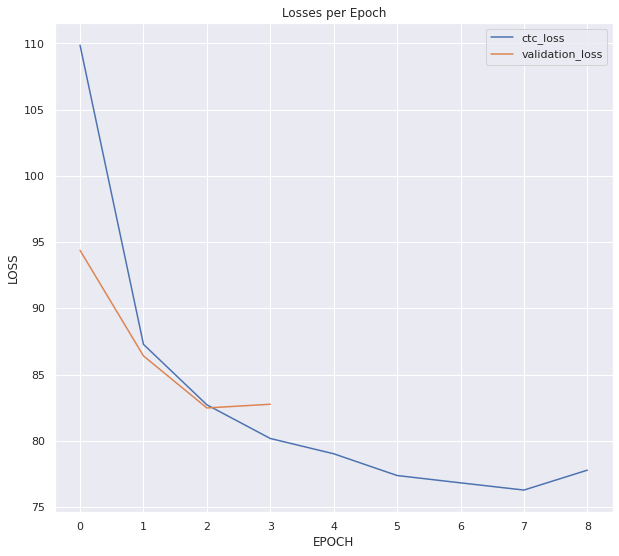

<Figure size 432x288 with 0 Axes>

In [20]:
plt.figure(figsize=(10,9))
plt.plot(vals['loss'],label="ctc_loss")
plt.plot(vals['val_loss'],label="validation_loss")
plt.title("Losses per Epoch")
plt.xlabel("EPOCH")
plt.ylabel("LOSS")
plt.legend()
plt.show()
plt.savefig("../plots/CNN.png")

